# Physics 381 - Final Project

Craig Michie, 30001523

## Introduction

The purpose of this final project is to read data off of a website, summarize it through plots. Secondly, to fit the trend through linear, periodic and a combined method using scipy.optimize. Thirdly, to find a model that better describes the trend.

## Task 1: Acquire Data from ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt and summarize key details.

Firstly, I need to install the required packages to be used throughout the project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize
import urllib.request

Secondly, code that opens the link and acquires it's data

In [3]:
url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt'
data = []
fid = urllib.request.urlopen(url)
for line in fid:
    data.append( line.decode('cp1252') )
fid.close()

In [5]:
data = np.genfromtxt( url, skip_header=72, max_rows=720, usecols=(2,3,4,5), names=['date', 'Average', 'interpolated', 'trend'] )
data.shape
for n in range(0,4):
    '''
    This loop will print the first 4 lines of the data lists, to ensure the data from the URL
    is being read and stored properly.
    '''
    print(data[n])


(1959.789, 313.33, 316.33, -1.)
(1959.874, 314.81, 316.68, -1.)
(1959.9562, 315.58, 316.35, -1.)
(1960.041, 316.43, 316.4, -1.)


After checking the first 4 lines with the lines from the URL, it is indeed reading and storing the data correctly. Thirdly, a code that will produce the plot of all 3 data columns to check the legitemency of the data.

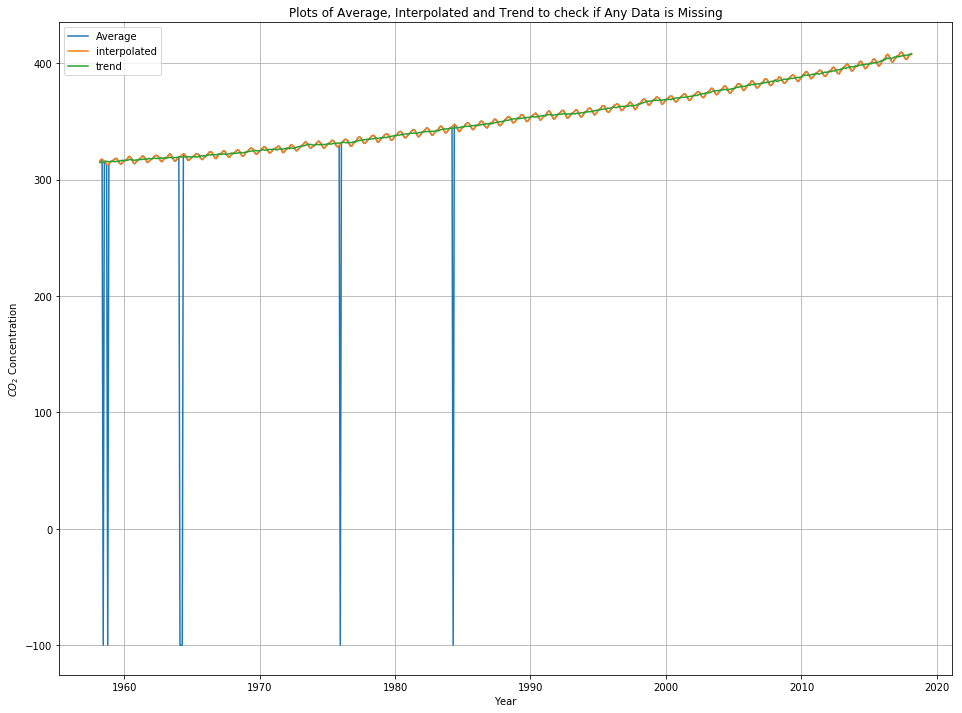

In [5]:
plt.figure(figsize=(16,12))
for name in ['Average', 'interpolated', 'trend']:
    '''
    This code produces a plot of all data verses the date, 
    this is done to check see if any data points are missing.
    '''
    dat = data[name]
    plt.plot( data['date'], dat, label=name )
    plt.legend(loc=2)
    plt.title('Plots of Average, Interpolated and Trend to check if Any Data is Missing')
    plt.grid()
    plt.xlabel('Year')
    plt.ylabel('$CO_2$ Concentration')

As it can be seen in the plot, there are a couple points missing in the average plot which have been replaced by the value -99.99. Therefore data from the average plot cannot be used for further discussion. Now, just a plot of the trend and interpolated to show a more realistic plot of all data. Since there is missing data from the average plot, for task 2 and 3 only the trend plot will be used, since the trend plot shows the difference between each data set the best and can be described long term as a linear plot and as a cosine plot for small intervals while a linear plot to the interpolation wouldn't be a useful plot. This can be seen in the plot below.

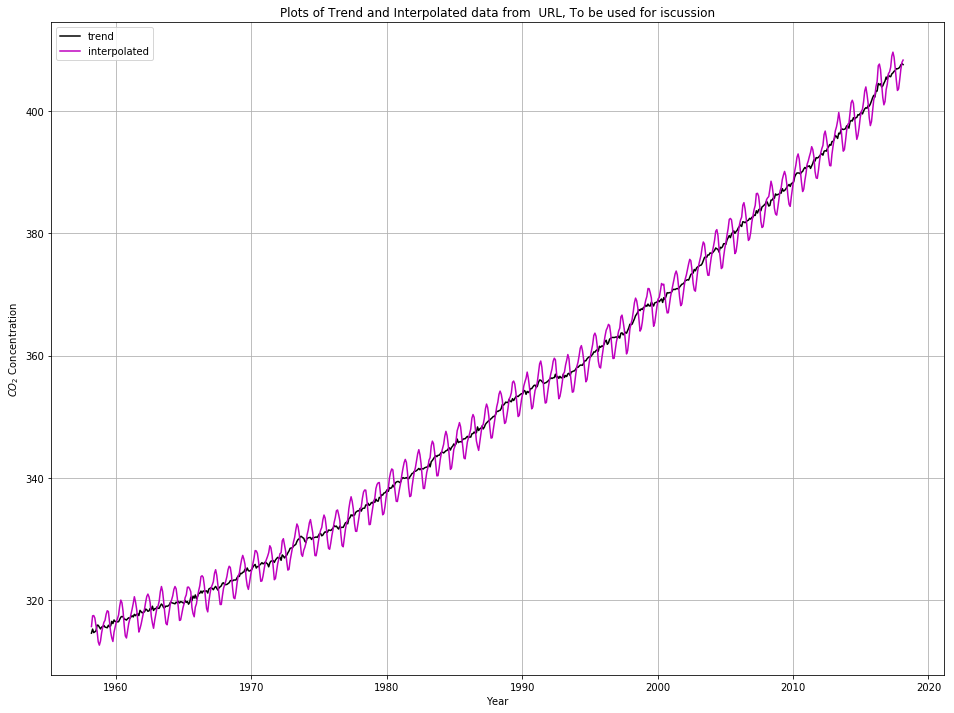

In [6]:
x=data['date']
y=data['trend']
z=data['interpolated']
'''
This sequence of code graphs both the interpolation and trend to show the behaviour of each plot
to determine which plot to use for task 2 and 3.
'''
plt.figure(figsize=(16,12))
#plot trend
plt.plot(x,y,label='trend',color='k')
plt.plot(x,z,label='interpolated',color='m')
plt.title('Plots of Trend and Interpolated data from  URL, To be used for iscussion')
plt.legend(loc=2)
plt.grid()
plt.xlabel('Year')
plt.ylabel('$CO_2$ Concentration')
plt.show()


## Task 2: use scipy.optimize tools to fit linear, cosine and a combinated plots to the trend plot.

Firstly, to fit the trend to a linear plot across the netire data.

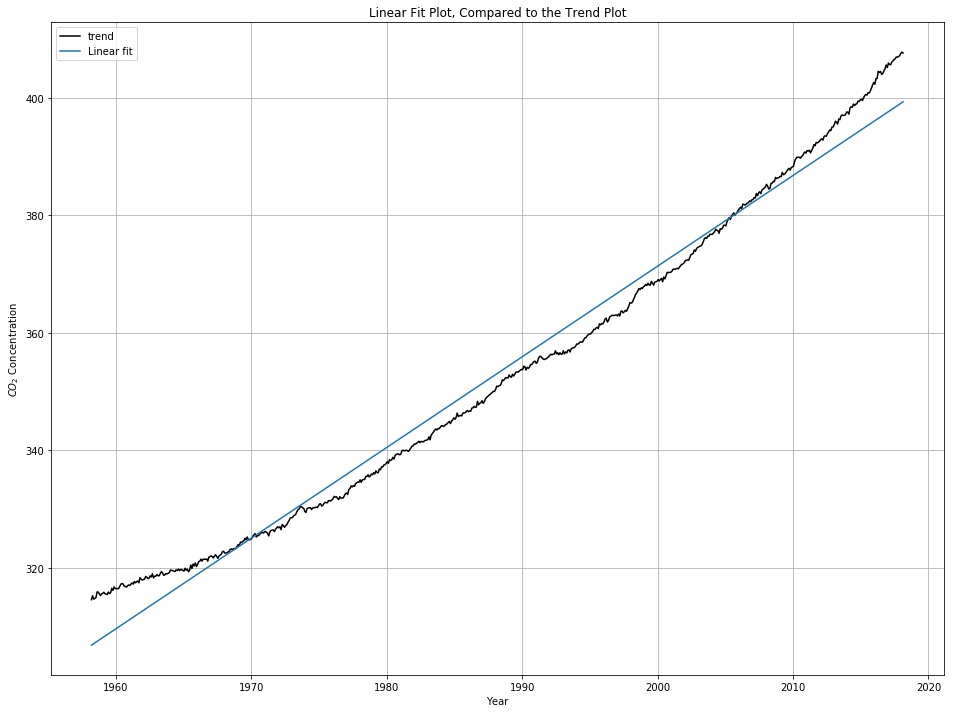

In [7]:
x=data['date']
y=data['trend']
'''
First a plot of the data to compare the fitted plot to.
'''
plt.figure(figsize=(16,12))
plt.plot(x,y,label='trend',color='k')

def Lin_func(x,p,q):
    '''
    This function is the equation of the linear fit that'll be used 
    to evaluate the new plot with the coefficients determined by
    using scipy.optimize library.
    '''
    return p*x+q

lin_fit = scipy.optimize.curve_fit(Lin_func,x,y)

'''
Now we plot the linear function with the acquired coefficients
from using scipy.optimize.curve_fit
'''
plt.plot(x,Lin_func(x,*lin_fit[0]),label='Linear fit')
plt.title('Linear Fit Plot, Compared to the Trend Plot')
plt.legend(loc=2)
plt.xlabel('Year')
plt.ylabel('$CO_2$ Concentration')
plt.grid()

Since the data for the periodic function contains a small portion of the full data it will be plotted on it's own below

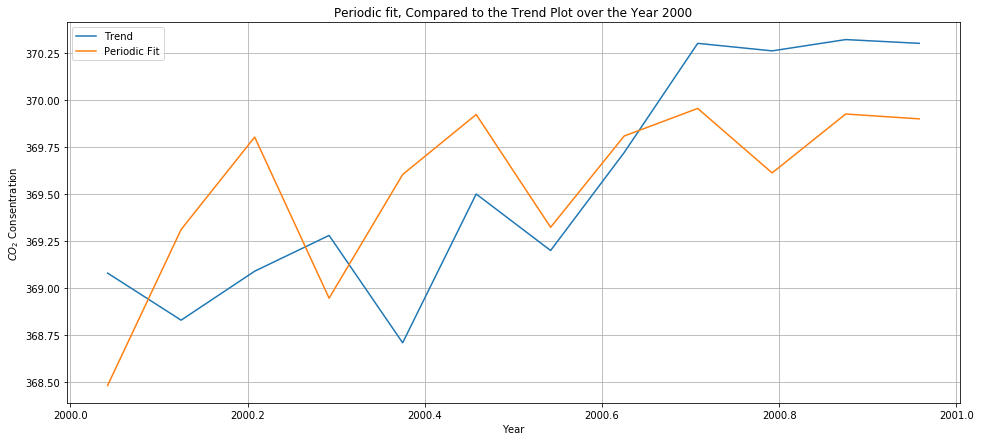

In [13]:
x=data['date']
y=data['trend']
data2000 = []
def Period_func(x,a,b,c):
    '''
    This function is the equation of the periodic fit
    that'll be used to evaluate the new plot with the 
    coefficients determined by using scipy.optimize library.
    '''
    return a*np.cos(b*x+c)
for i in range(720):
    '''
    First a list is needed only to acquire the data
    for the period of interest to be used for the curve fit
    ''' 
    if 2000 <= data[i][0] < 2001:
        data2000.append([data[i][0],data[i][3]])
data2000 = np.array(np.transpose(data2000))

#plot trend
plt.figure(figsize=(16,7))

plt.plot(data2000[0],data2000[1],label = 'Trend')

#compute periodic
per_fit_pts= scipy.optimize.curve_fit(Period_func,data2000[0],data2000[1])
#plot it
plt.plot(data2000[0],Period_func(data2000[0],*per_fit_pts[0]),label='Periodic Fit')

plt.title('Periodic fit, Compared to the Trend Plot over the Year 2000')
plt.xlabel('Year')
plt.ylabel('$CO_2$ Consentration')
plt.grid()
plt.legend()
plt.show()

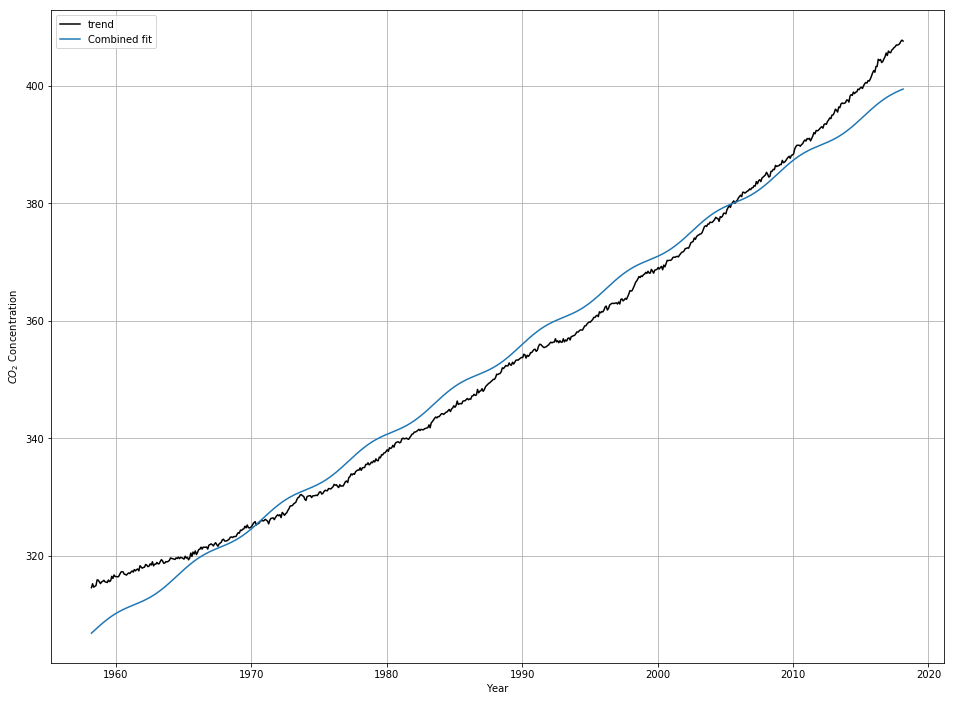

In [9]:
x=data['date']
y=data['trend']
plt.figure(figsize=(16,12))
plt.plot(x,y,label='trend',color='k')
def Combined_func(x,p,q,a,b,c):
    '''
    This function is the equation of the combination of the
    period fitand the linear fit that'll be used
    to evaluate the new plot with the coefficients 
    determined by using scipy.optimize library 
    '''
    return p*x+q+a*np.cos(b*x+c)
combined_fit = scipy.optimize.curve_fit(Combined_func,x,y)
'''
Now we plot the combination of the linear fit and the periodic fit 
which is done using curve fit of the combined function.
'''
plt.plot(x,Combined_func(x,*combined_fit[0]),label='Combined fit')
plt.legend(loc=2)
plt.xlabel('Year')
plt.ylabel('$CO_2$ Concentration')
plt.grid()

As it can be seen from the plots of the linear fit, periodic fit and combined fit it can be observed that the linear fit is an innacurrate way to represent the trend as the trends "path" curves and isn't linear so a polynomial fit would likely fit it better, the periodic fit resembled the trend quite nicely over the year, as it shows little change like the trend plot does but it is off by 20 on every point so it's not an accurate representation of the trends values and the combined fit didn't make it more accurate because it just oscillated over the linear fit, therefore the accuracy of the fit to the plot wasn't changed. Due to this in task 3, I'll try to create a better fit than the ones tested above.

## Task 3: Try to find a model which provides a better fit to the entire data set.  Discuss your choice and results.

I Believe a polynomial fit will work better than a linear, periodic and a combined fit. The code below will test this theory, by plotting the polynomial fit of degree 1 through 5.

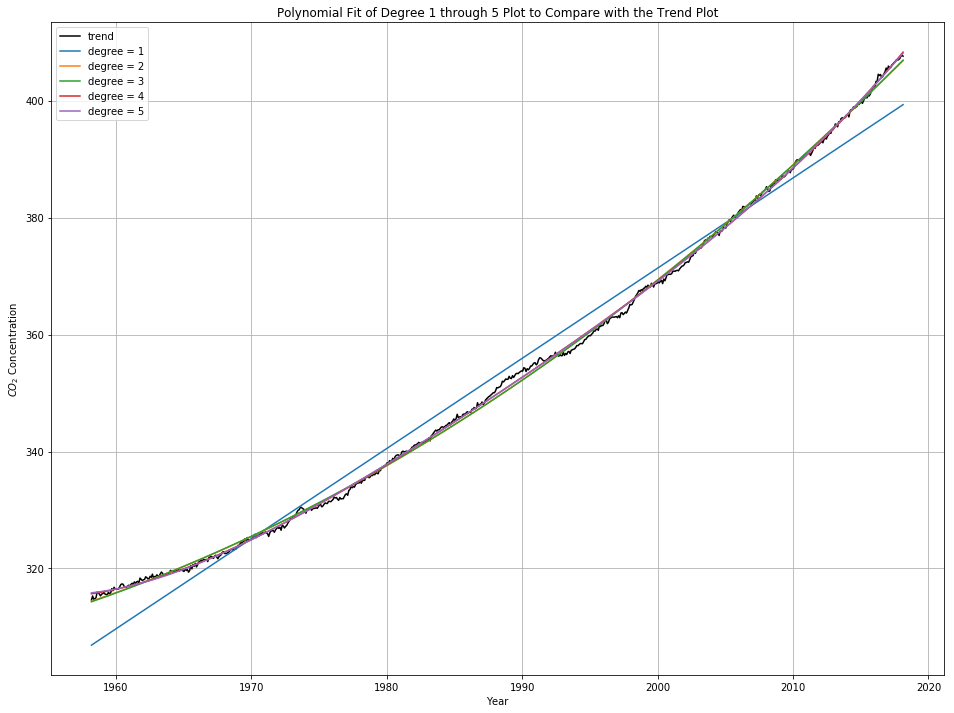

In [10]:
x=data['date']
y=data['trend']
plt.figure(figsize=(16,12))
'''
First the trend plot to compare the other plots to.
'''
plt.plot(x,y,label='trend',color='k')

for n in range(1,6):
    '''
    This is a loop to evaluate the polynomial fit of degree
    one through 5, using the numpy library. If, elif and else statements
    were used instead of a for loop since I had difficulties defining a 
    function of the 5th degree and for example using the equation for
    degree = 2, the coefficients for c3,c4,c5 were not equal to zero
    and were acquired using the polyfit and I couldn't overwrite them
    to be zero for some reason and therefore produced values of 
    much greater magnitude. I was unable to fix this problem so instead of
    a nice easy for loop, a series of if, elif and else statements were used.
    '''
    if n==1:
        c1,c0=np.polyfit(x,y,1)
        y1=c1*x+c0
        plt.plot(x,y1,label='degree = 1')
    elif n==2:
        c2,c1,c0=np.polyfit(x,y,2)
        y2=c2*x**2+c1*x+c0
        plt.plot(x,y2,label='degree = 2')
    elif n==3:
        c3,c2,c1,c0=np.polyfit(x,y,3)
        y3=c3*x**3+c2*x**2+c1*x+c0
        plt.plot(x,y3,label='degree = 3')
    elif n==4:
        c4,c3,c2,c1,c0=np.polyfit(x,y,4)
        y4=c4*x**4+c3*x**3+c2*x**2+c1*x+c0
        plt.plot(x,y4,label='degree = 4')
    else:
        c5,c4,c3,c2,c1,c0=np.polyfit(x,y,5)
        y5=c5*x**5+c4*x**4+c3*x**3+c2*x**2+c1*x+c0
        plt.plot(x,y5,label='degree = 5')
plt.title('Polynomial Fit of Degree 1 through 5 Plot to Compare with the Trend Plot')
plt.legend(loc=2)
plt.grid()
plt.xlabel('Year')
plt.ylabel('$CO_2$ Concentration')
plt.show()

The graph above shows the polynomial plot of degree 1 through 5. It can be seen as the degree increases it describes the trend plot more accurately than the linear plot, and the combined plot from task 2. 

## Conclusion

From Task 1, it was concluded that the average plot was missing data, the trend plot represents the data the best between the trend and interpolated plots because of these in task 2 and 3 only the trend plot was used. From Task 2, it was concluded that the linear fit, combined fit did not accurately represent the trend data so a new model had to be determined. In Task 3, I thought a polynomial plot of a high degree would more accurately fit the data better than the combined plot in Task 2, I plotted degree 1 through 5 to test my hypothesis. From the created plot it was determined that a high polynomial fit accurately represented the trend line. From the success of these tasks it can be concluded that the methods are practical for the uses of this final. 